### AdaBoost
An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.

In [15]:
# lets import the dependencies first
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split , KFold
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.model_selection import validation_curve

from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_absolute_error, r2_score

In [16]:
# loading our data
df = pd.read_csv("./Data/data.csv",sep=",")
df.drop(['Unnamed: 0'], axis=1, inplace=True) # There were some formatting issues while
                                              # writing the csv

In [17]:
df.head()

,DISTRICT,UPAZILA,STATION_ID,STATION_NAME,DATE,RAIN_FALL(mm),LATITUDE,LONGITUDE,WATER_LEVEL(m)
0,Bandarban,Lama,CL317,Lama,01-jan-2017,0.0,21.81,92.19,6.22
1,Bandarban,Lama,CL317,Lama,02-jan-2017,0.0,21.81,92.19,6.22
2,Bandarban,Lama,CL317,Lama,03-jan-2017,0.0,21.81,92.19,6.22
3,Bandarban,Lama,CL317,Lama,04-jan-2017,0.0,21.81,92.19,6.21
4,Bandarban,Lama,CL317,Lama,05-jan-2017,0.0,21.81,92.19,6.21


Defining our X and y

In [18]:
X = df['RAIN_FALL(mm)'].values.reshape(-1,1) # input feature
y = df['WATER_LEVEL(m)'].values.reshape(-1,1) # target feature

Making the train test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=17, shuffle=True
)

#### Model Building

Initialize the CV

In [20]:
kflod = KFold(n_splits=5,shuffle=True, random_state=17)

Init Adaboost with default parameters:
- base_estimator: DecisionTreeRegressor
- n_estimators: 50
- learning_rate: 1.0
- loss: linear

In [21]:
adaboost_model = AdaBoostRegressor(random_state=17)

CV Scores:

In [22]:
results = cross_val_score(
    adaboost_model,
    X_train,
    y_train,
    cv=kflod,
    scoring='neg_mean_absolute_error'
)
-results.mean()

0.5094645754708513

In [23]:
adaboost_model.fit(X_train,y_train)

AdaBoostRegressor(random_state=17)

In [24]:
# accuracy on the train set
pred = adaboost_model.predict(X_train)
mean_absolute_error(y_train,pred)

0.4607709600607148

In [25]:
# accuracy on the test set
pred = adaboost_model.predict(X_test)
mean_absolute_error(y_test,pred)

0.4663937995276585

#### Learning Curve

In [26]:
# Helper function
alphas = np.logspace(-2, 0, 20)
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, "-", **kwargs)
    plt.fill_between(
        x,
        mu - std,
        mu + std,
        edgecolor="none",
        facecolor=lines[0].get_color(),
        alpha=0.2,
    )

In [29]:
def plot_learning_curve():
    train_sizes = np.linspace(0.05,1,20)
    N_train, val_train, val_test = learning_curve(
        adaboost_model,X,y, train_sizes=train_sizes,cv=kflod,scoring='neg_mean_absolute_error'
    )
    plot_with_err(N_train, val_train, label="training scores")
    plot_with_err(N_train, val_test, label="validation scores")
    plt.xlabel("Training Set Size")
    plt.ylabel("Negative MAE")
    plt.legend()
    plt.grid(True);

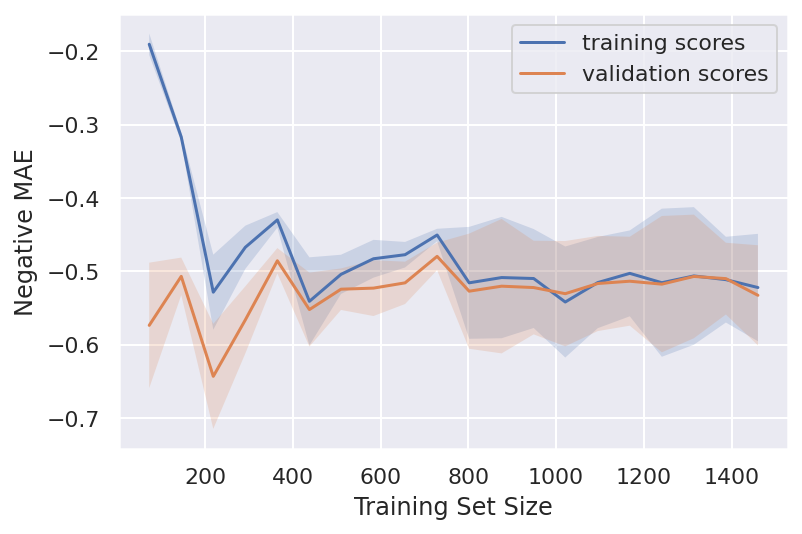

In [30]:
plot_learning_curve()

Note: 
- There's no room for improvement as pictured in the plot..
- The two curves already connverged!